<a href="https://colab.research.google.com/github/zih-yan/abc1/blob/main/EX04_04_%E5%8A%A0%E5%B7%9E%E6%88%BF%E5%83%B9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 問題定義



*   使用 Scikit-Learn 內建的加州房價資料集，以梯度下降法線性迴歸預測加州房價中位數。
*   需將數值進行 Z 分數標準化。
*   以均方誤差 (MSE)評估模型。
*   訓練模型後保存模型及標準化量尺，做為未來預測資料使用。





## 資料收集

In [ ]:
from sklearn.datasets import fetch_california_housing
# 載入資料集
california_housing = fetch_california_housing(as_frame=True)
X, y = california_housing.data, california_housing.target
df = california_housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 資料前處理

### 資料清理

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 探索性分析

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df_cor = df.corr()
df_cor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


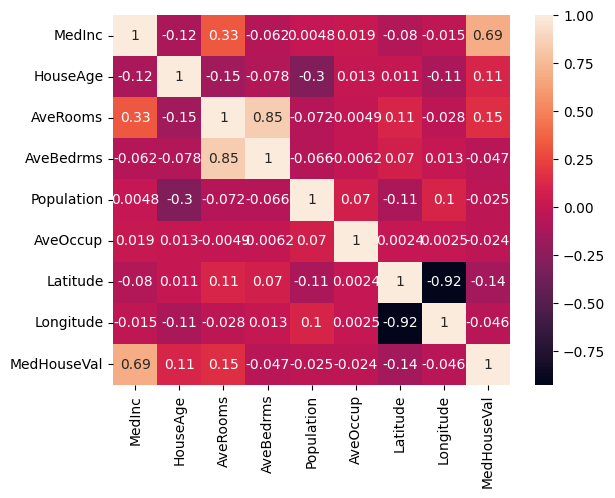

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_cor, annot=True)
plt.show()

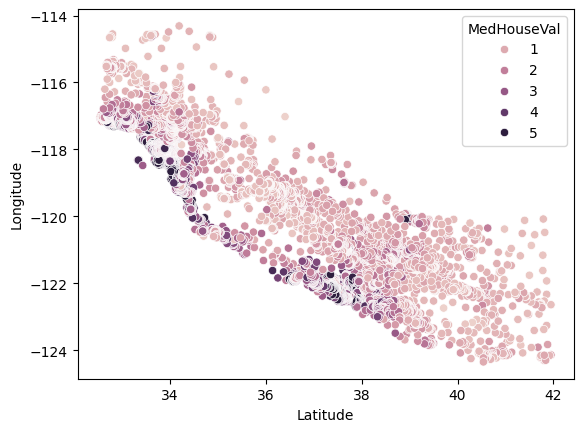

In [ ]:
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='MedHouseVal')
plt.show()

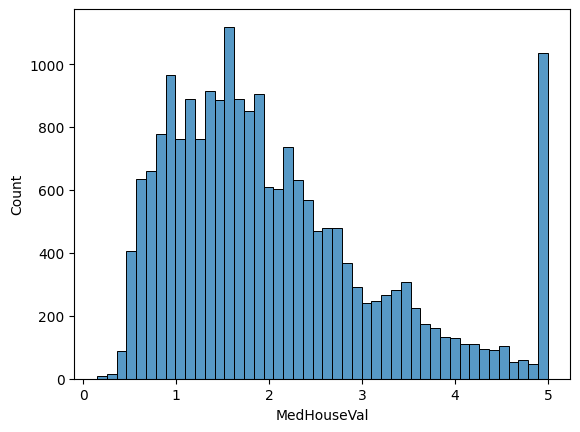

In [ ]:
sns.histplot(data=df, x='MedHouseVal')
plt.show()

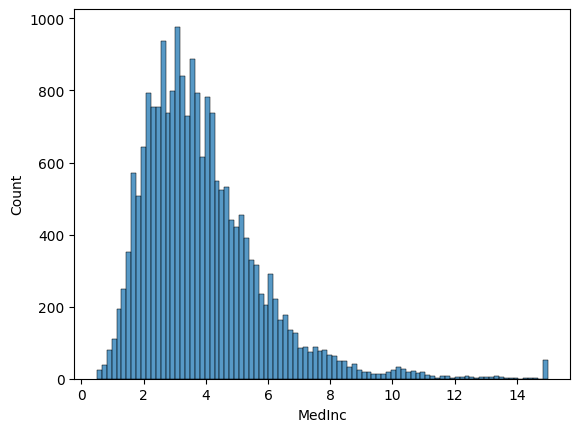

In [ ]:
sns.histplot(data=df, x='MedInc')
plt.show()

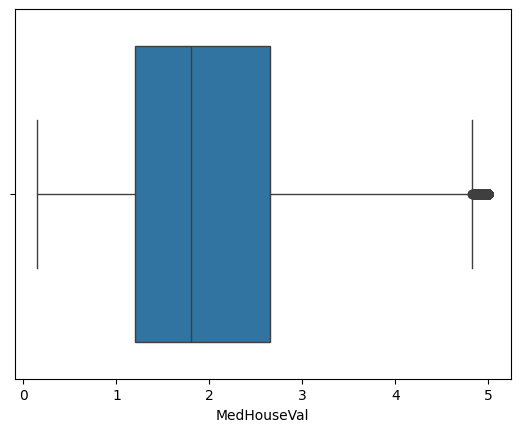

In [ ]:
sns.boxplot(data=df, x='MedHouseVal')
plt.show()

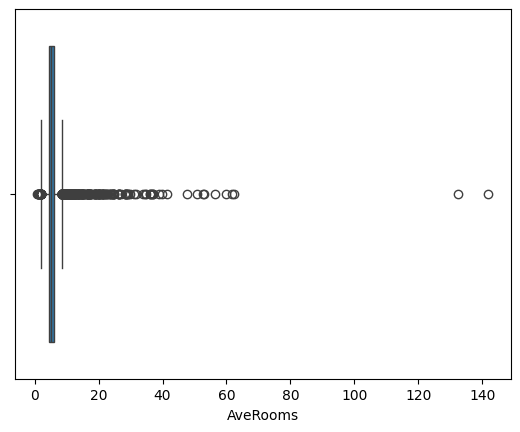

In [ ]:
sns.boxplot(data=df, x='AveRooms')
plt.show()

### 資料分割

In [ ]:
from sklearn.model_selection import train_test_split
# X: features, y: label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 類別轉換

### 特徵縮放

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 模型訓練

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)

SGDRegressor()

In [ ]:
sgdr.score(X_train, y_train)


0.6086123941559222

## 模型評估

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = sgdr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.5582722997098007


## 模型調整

## 模型部署

### 儲存模型

In [ ]:
import joblib

joblib.dump(scaler, 'sgdr_model.pkl')
joblib.dump(sgdr, 'sgdr_model.pkl')


['sgdr_model.pkl']

### 推論預測

In [ ]:
# file ipython-input-27-478843478
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import pandas as pd
import joblib

# Load the scaler from its file
loaded_scaler = joblib.load('scaler.pkl')
# Load the model from its file
loaded_model = joblib.load('sgdr_model.pkl')

data = {
    'MedInc': [8.0],        # 中位數收入
    'HouseAge': [30.0],     # 房屋年齡
    'AveRooms': [6.0],      # 平均房間數
    'AveBedrms': [2.0],     # 平均臥室數
    'Population': [1000],    # 人口數
    'AveOccup': [3.0],      # 平均住戶數
    'Latitude': [37.0],     # 緯度
    'Longitude': [-122.0]  # 經度
}

virtual_df = pd.DataFrame(data, columns=data.keys())

# Now loaded_scaler is a StandardScaler and has the transform method
virtual_df_scaled = loaded_scaler.transform(virtual_df)
# Use loaded_model for prediction
pred = loaded_model.predict(virtual_df_scaled)

print(pred)

[5.17930473]
